# Correlations between Immigration and Real GDP in Britain 

### It is a common stereotype that immigrants do not contribute to the economy and may in fact be a burden to the economy. The following is an exercise to visualize the data regarding the concentration of immigrants in Britain since World War 2 up until 2016 and it's impact on her real GDP.

#### Importing data and libraries

In [1]:
import numpy as np
from numpy import corrcoef
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
migration = pd.read_excel('/Users/chinmayasukumar/Documents/Springboard/Unit 20/archive-4/millenniumofdata_v3_final.xlsx'\
                    , sheet_name='A19. Migration flows')

In [3]:
gdp = pd.read_excel('/Users/chinmayasukumar/Documents/Springboard/Unit 20/archive-4/millenniumofdata_v3_final.xlsx'\
                   , sheet_name='A21. GDP per capita 1086+')

In [4]:
migration.head()

,Unnamed: 0,Immigration,Emigration,Net Migration,Unnamed: 4,UK Population,Unnamed: 6,Immigration.1,Emigration.1,Net Migration.1,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,1850,NaN,NaN,NaN,NaN,27524.324,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1851,NaN,NaN,NaN,NaN,27392.849,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1852,NaN,NaN,NaN,NaN,27448.206,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1853,NaN,330.0,NaN,NaN,27542.368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,NaN,NaN
4,1854,NaN,323.0,NaN,NaN,27658.310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,NaN,NaN


In [5]:
migration = migration.rename(columns={'Unnamed: 0':'Year'})

#### This exercise will take into consideration the years following World War 2 since immigration from visible minorities was small if not insignificant before then.

In [6]:
migration = migration[migration.Year >= 1947]

In [7]:
net_m = migration.iloc[:,[0,1,2,3,5]]

In [8]:
net_m = net_m.rename(columns={'Immigration':'immigration','Emigration':'emigration', 'Net Migration':'net_m',\
                              'UK Population':'population'})

In [9]:
net_m.head()

,Year,immigration,emigration,net_m,population
97,1947,181.0,244.0,-63.0,49538.7
98,1948,230.0,307.0,-77.0,50033.2
99,1949,252.0,316.0,-64.0,50331.0
100,1950,262.0,325.0,-63.0,50571.5
101,1951,265.0,363.0,-98.0,50301.9


In [10]:
net_m.iloc[:,1:] = net_m.iloc[:,1:]*1000

In [11]:
net_m.head()

,Year,immigration,emigration,net_m,population
97,1947,181000.0,244000.0,-63000.0,49538700.0
98,1948,230000.0,307000.0,-77000.0,50033200.0
99,1949,252000.0,316000.0,-64000.0,50331000.0
100,1950,262000.0,325000.0,-63000.0,50571500.0
101,1951,265000.0,363000.0,-98000.0,50301900.0


In [12]:
gdp.head()

,Unnamed: 0,Nominal GDP at market prices,"Factor cost adjustment 1270-1700, assuming direct taxes on land are a tax on production",Nominal GDP at factor cost,"Real GDP, 2013 market prices","Real GDP, at 2013 factor cost",Population,Nominal GDP per capita,Real GDP per capita,GDP deflator at market prices,...,Nominal GDP per capita.2,Real GDP per capita.2,GDP deflator.1,Unnamed: 25,Nominal GDP.2,"Real GDP, 2013 prices (using GB+NI GDP deflator)",Population.3,Nominal GDP per capita.3,Real GDP per capita.3,GDP deflator.2
0,1086,NaN,NaN,0.43025,NaN,NaN,1.710000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1087,NaN,NaN,NaN,NaN,NaN,1.719810,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1088,NaN,NaN,NaN,NaN,NaN,1.729676,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1089,NaN,NaN,NaN,NaN,NaN,1.739598,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1090,NaN,NaN,NaN,NaN,NaN,1.749578,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
gdp = gdp.rename(columns={'Unnamed: 0':'Year', 'Real GDP, 2013 market prices':'r_gdp', \
                          'Real GDP per capita':'r_gdp_pc'})

In [14]:
gdp_pc = gdp[['Year', 'r_gdp', 'r_gdp_pc']]

In [15]:
gdp_pc = gdp_pc[gdp_pc.Year >= 1947]

In [16]:
gdp_pc

,Year,r_gdp,r_gdp_pc
861,1947,2.739824e+05,6756.821441
862,1948,2.828058e+05,6906.125046
863,1949,2.925533e+05,7098.396796
864,1950,3.024324e+05,7301.426620
865,1951,3.139632e+05,7615.290870
...,...,...,...
926,2012,1.455375e+06,27206.467924
927,2013,1.483697e+06,27544.320506
928,2014,1.534814e+06,28256.799930
929,2015,1.571982e+06,28692.968732


In [17]:
gdp_pc.isna().sum()

Year        0
r_gdp       0
r_gdp_pc    0
dtype: int64

In [18]:
net_m.isna().sum()

Year           0
immigration    0
emigration     0
net_m          0
population     0
dtype: int64

In [19]:
full_data = gdp_pc.set_index('Year').join(net_m.set_index('Year'), on='Year', how='inner')

In [20]:
full_data.head()

,r_gdp,r_gdp_pc,immigration,emigration,net_m,population
Year,,,,,,
1947,273982.352599,6756.821441,181000.0,244000.0,-63000.0,49538700.0
1948,282805.820613,6906.125046,230000.0,307000.0,-77000.0,50033200.0
1949,292553.325546,7098.396796,252000.0,316000.0,-64000.0,50331000.0
1950,302432.392027,7301.426620,262000.0,325000.0,-63000.0,50571500.0
1951,313963.211989,7615.290870,265000.0,363000.0,-98000.0,50301900.0


#### A percentage of immigrants relative to the entire population will be the main variable

In [21]:
full_data['perc'] = (full_data.immigration.cumsum())*100/(full_data.population)

In [22]:
full_data.describe()

,r_gdp,r_gdp_pc,immigration,emigration,net_m,population,perc
count,7.000000e+01,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,8.279732e+05,17084.880041,325874.285714,288702.857143,42111.428571,5.656557e+07,16.074435
std,4.006305e+05,7109.593093,144864.347026,59938.395842,123766.436815,4.006371e+06,9.366584
min,2.739824e+05,6756.821441,153000.000000,164000.000000,-98000.000000,4.953870e+07,0.365371
25%,4.922598e+05,11004.760093,212250.000000,238500.000000,-56075.000000,5.408068e+07,9.210979
50%,7.216841e+05,15441.219265,272050.000000,290350.000000,-2850.000000,5.632271e+07,14.901197
75%,1.154635e+06,23573.113412,438100.000000,325750.000000,153400.000000,5.863206e+07,22.493969
max,1.600372e+06,28982.268231,632000.000000,427200.000000,332300.000000,6.557200e+07,34.788019


/var/folders/mh/9l7f5q2x0bsc05929xvm2nnh0000gn/T/ipykernel_3611/3913032295.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], c='b')
/var/folders/mh/9l7f5q2x0bsc05929xvm2nnh0000gn/T/ipykernel_3611/3913032295.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])


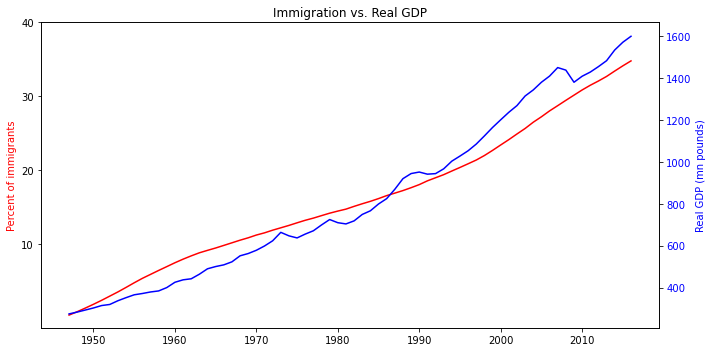

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(full_data.index, full_data.perc, c='r')
ax.set_ylabel('Percent of immigrants', c='r')
ax.set_yticks([10,20,30,40],c='r')

ax2 = ax.twinx()
ax2.plot(full_data.index, full_data.r_gdp, c='b')
ax2.set_ylabel('Real GDP (mn pounds)', c='b')
ax2.set_yticklabels([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], c='b')

ax.set_xticklabels([1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax.set_title('Immigration vs. Real GDP')

plt.tight_layout()

plt.savefig(fname='/Users/chinmayasukumar/Documents/Springboard/Unit 20/Time', format='jpeg', dpi=1000)

A regression model will be built to ascertain any correlations

In [24]:
lr = LinearRegression()
lr.fit(np.array(full_data.r_gdp).reshape(-1,1), np.array(full_data.perc).reshape(-1,1))

LinearRegression()

In [25]:
lr.coef_, lr.intercept_

(array([[2.31886326e-05]]), array([-3.12513114]))

/var/folders/mh/9l7f5q2x0bsc05929xvm2nnh0000gn/T/ipykernel_3611/813976453.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])


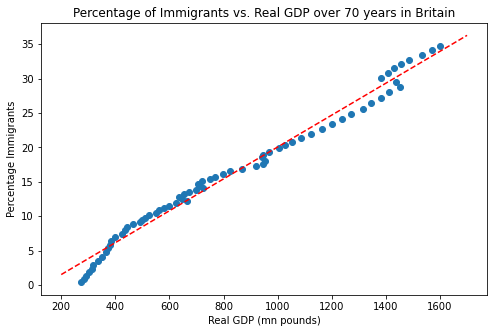

In [26]:
x = np.arange(0.2*10**6, 1.8*10**6, 0.1*10**6).reshape(-1,)

m = np.array(lr.coef_).reshape(1,)
b = np.array(lr.intercept_)
y = m*x + b

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(full_data.r_gdp, full_data.perc)

ax.plot(x, y, linestyle='--', c='r')

ax.set_xlabel('Real GDP (mn pounds)')
ax.set_xticklabels([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])
ax.set_ylabel('Percentage Immigrants')
ax.set_title('Percentage of Immigrants vs. Real GDP over 70 years in Britain')

plt.savefig('/Users/chinmayasukumar/Documents/Springboard/Unit 20/PercImmVsRealGDP', format='jpeg', dpi=1000)

In [27]:
corrcoef(full_data.perc, full_data.r_gdp)[1,0]

0.9918315450127023

### It is demonstrated that immigrants may not be extraordinarily deletrious to the British economy. Post-war Britain saw a surge in immigration which lessened in the following decades followed by another surge around the turn of the millenium. Throughout the decades, immigration rates have fluctuated, however real GDP has always risen seemingly without concern. The hypothetical negative externalities immigration has on Britain's economy is not visible at a macro scale. 